###  Python e Finanças

Bibliotecas mais usadas:

- pandas
- matplotlib
- numpy
- datetime

Vamos usar também ferramentas para puxar cotações e afins:

- pandas_datareader
- yfinance

In [9]:
!pip install pandas-datareader
!pip install yfinance

#### Referências:
- Índices:

^INDICE -> exemplo: ^BVSP (BOVESPA)

- Ações BR:

TICKER.SA -> exemplo: ITUB4.SA (ação ITUB4 da bolsa brasileira)

- Ações Internacionais:

TICKER -> exemplo: GOOG (ação do google na bolsa americana)

#### Analisando o IBOV

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import pandas_datareader.data as pdr
import yfinance

# ESTA LINHA DE CÓDIGO É MUITO IMPORTANTE
# SOBRESCREVE O MÉTODO DE COMUNICAÇÃO COM YAHOO FINANCE DO PANDAS DATAREADER
yfinance.pdr_override()

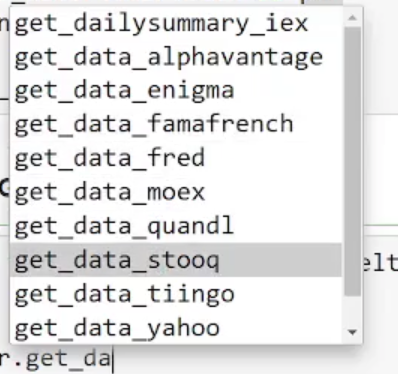

In [ ]:
data_inicial = datetime.now() - timedelta(days=360)
data_final = datetime.now()

# Acima, alguns exemplos que podem ser selecionados ao fazer a busca
# df_ibov = pdr.get_data_yahoo(["^BVSP", "ITUB4.SA"], data_inicial, data_final)
df_ibov = pdr.get_data_yahoo("^BVSP", data_inicial, data_final)["Adj Close"] # Utilizado para trazer somente a coluna Adj Close
display(df_ibov)

[*********************100%***********************]  1 of 1 completed


Date
2022-08-15    113032.000000
2022-08-16    113512.000000
2022-08-17    113708.000000
2022-08-18    113813.000000
2022-08-19    111496.000000
                  ...      
2023-08-02    120859.000000
2023-08-03    120586.000000
2023-08-04    119508.000000
2023-08-07    119380.000000
2023-08-08    119090.242188
Name: Adj Close, Length: 246, dtype: float64

#### Analisando o Gráfico

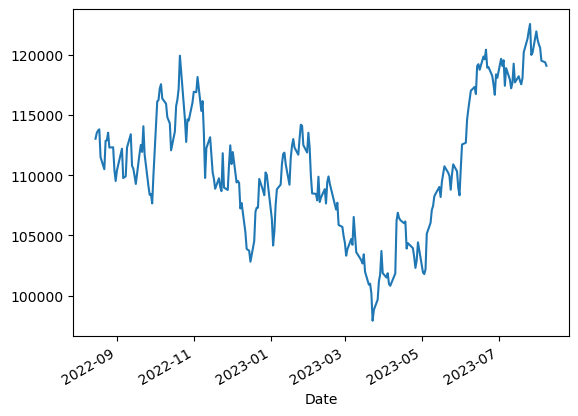

In [15]:
df_ibov.plot()
plt.show()

#### Retorno do IBOV

In [16]:
retorno_ibov = df_ibov.iloc[-1] / df_ibov.iloc[0] - 1
print(f"O retorno do IBOV foi: {retorno_ibov:.1%}")

O retorno do IBOV foi: 5.4%


#### Média Móvel

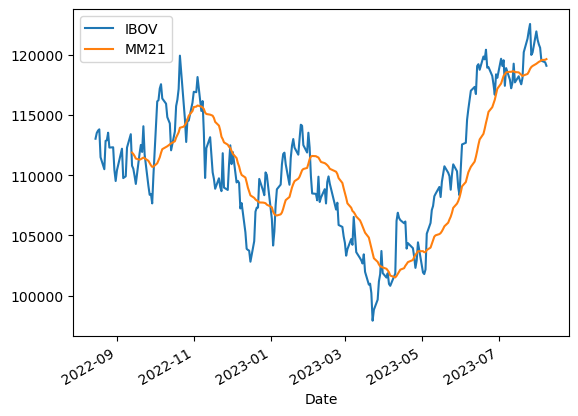

In [ ]:
df_ibov.plot(label="IBOV")
# Para cada dia, calcula a média dos últimos 21 dias (incluindo o de referência)
media_movel = df_ibov.rolling(21).mean() 
media_movel.plot(label="MM21")
plt.legend()
plt.show()